In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2
import cv2


def amplitude(z):
    return np.abs(z)

def phase(z):
    return np.angle(z)




def gerchberg_saxton(target, iterations):
    A = ifft2(target)
    height,width =target.shape
    source = np.random.rand(height, width) + 1j * np.random.rand(height,width )
    source /= np.abs(source)
    for i in range(iterations):
        B = amplitude(source) * np.exp(1j * phase(A))
        C = fft2(B)
        D = amplitude(target) * np.exp(1j * phase(C))
        A = ifft2(D)

    retrieved_phase = phase(A)
    return retrieved_phase



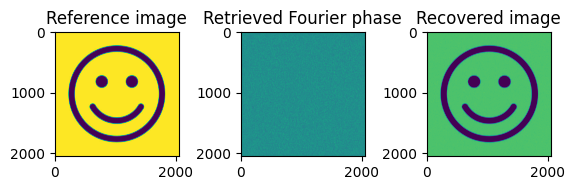

In [8]:
#filename = 'images.jpg'
image = 'smile2.jpg'
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
img = img.astype(float) 

# --- Maximum number of iterations
iter = 100

retrievedPhase = gerchberg_saxton(img, iter)

recoveredImage = ifft2(np.exp(-1j*retrievedPhase))
plt.figure(1)

# --- Reference image
plt.subplot(131)
plt.imshow(img)
plt.title('Reference image')

# --- Retrieved Fourier phase
plt.subplot(132)
plt.imshow(retrievedPhase)
plt.title('Retrieved Fourier phase')

plt.subplot(133)
plt.imshow(np.absolute(recoveredImage)**2)
plt.title('Recovered image')

plt.subplots_adjust(hspace=0.5, wspace=0.5)




plt.show()